# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
n_validation

4410

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

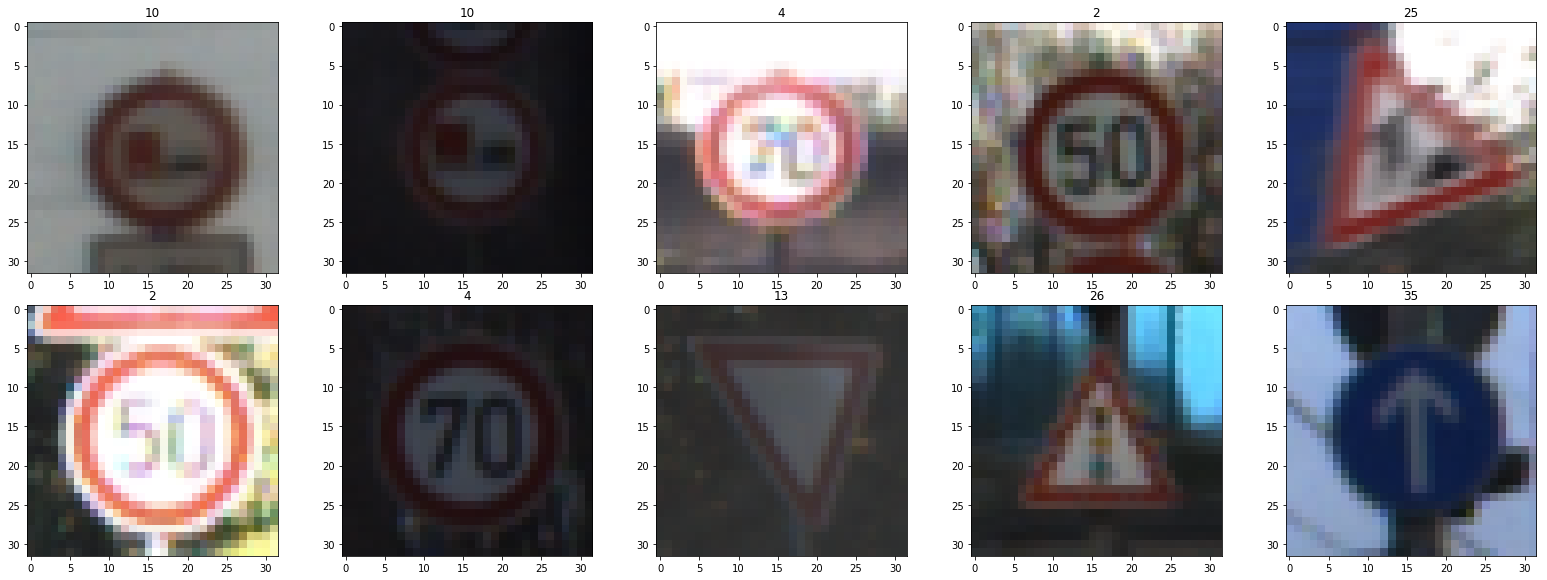

In [5]:
# Draw some random traffic signs from the training set
import random 
fig, axes = plt.subplots(2,5, figsize = (22,8))
fig.tight_layout()
axes = axes.ravel()

#i_label = []
for i in range(len(axes)):
    rand_fig_index = random.randint(0, len(X_train))
    j = y_train[rand_fig_index]
    #if j not in i_label:
    image = X_train[rand_fig_index]
    axes[i].imshow(image)
    axes[i].set_title(j)
    #i_label.append(j)



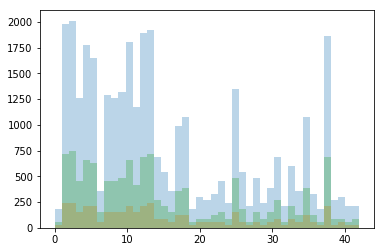

In [6]:
# Plot different classes as histogram
kwargs = dict(alpha=0.3, bins=n_classes)
plt.hist(y_train, **kwargs)
plt.hist(y_valid, **kwargs)
plt.hist(y_test, **kwargs)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


In [8]:
# RGB images into grayscale
import tensorflow as tf
def rgbtogray(images):
    with tf.Session() as sess:
        images_coverted = sess.run(tf.image.rgb_to_grayscale(images))
    return images_coverted

    

(32, 32, 1)


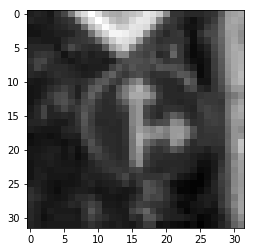

In [9]:
# Testing the function rgbtogray
img = rgbtogray(X_train[1000])
print(img.shape)
plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

In [10]:
X_train = rgbtogray(X_train)
X_valid = rgbtogray(X_valid)
X_test = rgbtogray(X_test)
print ('rbg to grayscale done!')

rbg to grayscale done!


In [11]:
# Normalize the data
X_train = X_train - np.mean(X_train)
X_valid = X_valid - np.mean(X_valid)
X_test = X_test - np.mean(X_test)
print ('Normalization done!')

Normalization done!


In [12]:
# Image augmentation, getting more training image data

In [13]:
# Brightness adjustment method
def img_bright(img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        img_randbright = sess.run(tf.image.random_brightness(img, max_delta = 0.8, seed = 442))
    return img_randbright

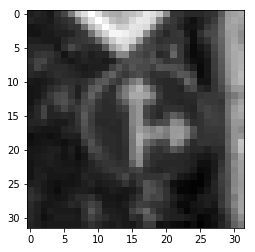

In [14]:
img = img_bright(X_train[1000])
plt.imshow(np.squeeze(img), cmap='gray')

In [15]:
# Hrizontal flipping images
def img_hflip(img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        img_hflip = sess.run(tf.image.flip_left_right(img))
    return img_hflip

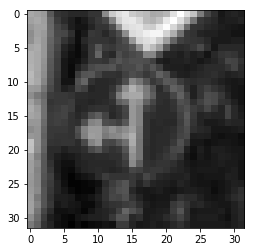

In [16]:
img = img_hflip(X_train[1000])
plt.imshow(np.squeeze(img), cmap='gray')

In [17]:
# Contrat adjust images
def img_contrast(img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        img_contrasted = sess.run(tf.image.random_contrast(img, lower=1, upper=2.0, seed=442))
    return img_contrasted

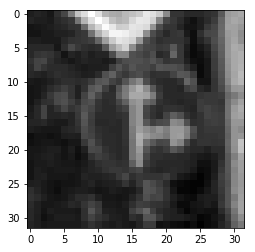

In [18]:
img = img_contrast(X_train[1000])
plt.imshow(np.squeeze(img), cmap='gray')

In [19]:
# Central crop images
def img_ccrop(img):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        img_croped = sess.run(tf.image.central_crop(img, central_fraction=0.7))
    return img_croped

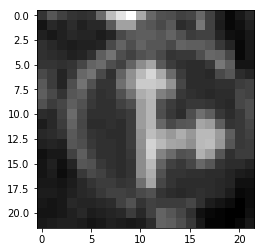

In [20]:
img = img_ccrop(X_train[1000])
plt.imshow(np.squeeze(img), cmap='gray')

In [21]:
X_train.shape, y_train.shape

((34799, 32, 32, 1), (34799,))

In [22]:
X_train[1000].shape

(32, 32, 1)

In [23]:
# Augment the train images
'''
The training data needed is 10 x 128. The average number of median sized training classes is about 1250. 
And the upper number of validation classes is 750. 
While the lower number of the training classes is 250.
In consideration of the sizes above, augment the lower parts of the training classes to 750 seems to be a choice.  
'''
'''
The brightness and contrast adjustment will be applied to all the operations, once with horizontal flipping and
the other one with central cropping. All these will add up to about 750 images per class in the training set.
'''
'''
def DataAug_flip(images):
    images_bright = img_bright(images)
    images_flip = img_hflip(images_bright)
    images_flip = img_contrast(images_flip)
    return images_flip


def DataAug_crop(images):
    images_bright = img_bright(images)
    images_crop = img_ccrop(images_bright)
    images_crop = img_contrast(images_crop)
    return images_crop

X_train_aug = []
y_train_aug = []

for class_n in range(1):
    pictures = np.where(y_train == class_n)
    samples_num = len(pictures[0])
    
    if samples_num < 500:
        for images in range(samples_num):
            images_flipped = DataAug_flip(X_train[images])
            #images_cropped = DataAug_crop(images)
            X_train_aug.append(images_flipped)
            #X_train_aug.append(images_cropped)
            y_train_aug.append(class_n)
            #y_train_aug.append(class_n)
return X_train_aug, y_train_aug

            
print ('Data augment done!')
'''

"\ndef DataAug_flip(images):\n    images_bright = img_bright(images)\n    images_flip = img_hflip(images_bright)\n    images_flip = img_contrast(images_flip)\n    return images_flip\n\n\ndef DataAug_crop(images):\n    images_bright = img_bright(images)\n    images_crop = img_ccrop(images_bright)\n    images_crop = img_contrast(images_crop)\n    return images_crop\n\nX_train_aug = []\ny_train_aug = []\n\nfor class_n in range(1):\n    pictures = np.where(y_train == class_n)\n    samples_num = len(pictures[0])\n    \n    if samples_num < 500:\n        for images in range(samples_num):\n            images_flipped = DataAug_flip(X_train[images])\n            #images_cropped = DataAug_crop(images)\n            X_train_aug.append(images_flipped)\n            #X_train_aug.append(images_cropped)\n            y_train_aug.append(class_n)\n            #y_train_aug.append(class_n)\nreturn X_train_aug, y_train_aug\n\n            \nprint ('Data augment done!')\n"

In [52]:
# Data augment, two ways of data aument, take too much time to be done, used only one instead.
'''
    if samples_num <= 400:
        for i in range(samples_num):
            img_num = pictures[0][i]
            image = img_bright(X_train[img_num])
            X_train_aug.append(image)
            y_train_aug.append(class_n)


X_train_aug = []
y_train_aug = []

for class_n in range(n_classes):
    pictures = np.where(y_train == class_n)
    samples_num = len(pictures[0])

    if samples_num <= 300:
        for i in range(samples_num):
            img_num = pictures[0][i]
            image = img_hflip(X_train[img_num])
            X_train_aug.append(image)
            y_train_aug.append(class_n)
    else:
        print ('Class ', class_n, ' is not augmented!')
#return X_train_aug, y_train_aug
print ('Partial Augment done!')
'''

"\n    if samples_num <= 400:\n        for i in range(samples_num):\n            img_num = pictures[0][i]\n            image = img_bright(X_train[img_num])\n            X_train_aug.append(image)\n            y_train_aug.append(class_n)\n\n\nX_train_aug = []\ny_train_aug = []\n\nfor class_n in range(n_classes):\n    pictures = np.where(y_train == class_n)\n    samples_num = len(pictures[0])\n\n    if samples_num <= 300:\n        for i in range(samples_num):\n            img_num = pictures[0][i]\n            image = img_hflip(X_train[img_num])\n            X_train_aug.append(image)\n            y_train_aug.append(class_n)\n    else:\n        print ('Class ', class_n, ' is not augmented!')\n#return X_train_aug, y_train_aug\nprint ('Partial Augment done!')\n"

In [53]:
'''
np.array(X_train_aug).shape
'''

'\nnp.array(X_train_aug).shape\n'

In [ ]:
X_train = np.append(X_train, X_train_aug, axis=0)
y_train = np.append(y_train, y_train_aug, axis=0)

In [25]:
X_train.shape

(34799, 32, 32, 1)

### Model Architecture

In [26]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [27]:
# Shuffle the training data set
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [28]:
# Import tensorflow and set the hyperparamters
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128
keep_prob = tf.placeholder(tf.float32)

In [29]:
# Set the archetiete of TrafficNet
from tensorflow.contrib.layers import flatten

def TrafficNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal((5,5,1,6), mean = mu, stddev = sigma))
    conv1_b =tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=(1,2,2,1), padding = 'VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal((5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 240.
    fc1_w = tf.Variable(tf.truncated_normal((400,240), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1 = tf.matmul(conv2, fc1_w) + fc1_b
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)


    # TODO: Layer 4: Fully Connected. Input = 240. Output = 160.
    fc2_w = tf.Variable(tf.truncated_normal((240,160), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(160))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 160. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal((160,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [32]:
rate = 0.001

logits = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.9})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficnet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.600

EPOCH 2 ...
Validation Accuracy = 0.801

EPOCH 3 ...
Validation Accuracy = 0.856

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.905

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.922

EPOCH 8 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.944

Model saved


In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trafficnet
Test Accuracy = 0.927


In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trafficnet
Test Accuracy = 0.996


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [37]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

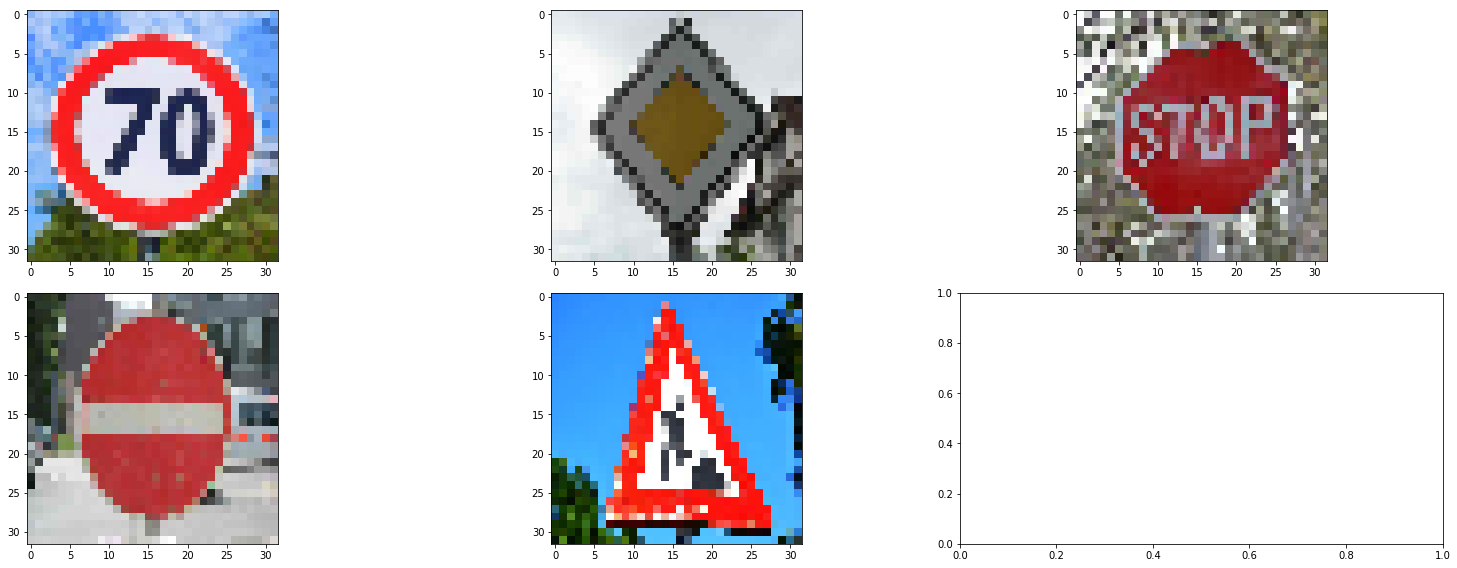

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

# Layout the subplots
fig, axes = plt.subplots(2,3, figsize=(22,8))
fig.tight_layout()
axes = axes.ravel()

# Read the test images
img0 = mpimg.imread('test-data/4.jpg')
img1 = mpimg.imread('test-data/12.jpg')
img2 = mpimg.imread('test-data/14.jpg')
img3 = mpimg.imread('test-data/17.jpg')
img4 = mpimg.imread('test-data/25.jpg')

img0 = cv2.resize(img0, (32,32))
img1 = cv2.resize(img1, (32,32))
img2 = cv2.resize(img2, (32,32))
img3 = cv2.resize(img3, (32,32))
img4 = cv2.resize(img4, (32,32))

# Display the test images in the subplots
axes[0].imshow(img0)
axes[1].imshow(img1)
axes[2].imshow(img2)
axes[3].imshow(img3)
axes[4].imshow(img4)


In [39]:
# Collect the test data set
test_data = np.array([img0, img1, img2, img3, img4])
test_data.shape

(5, 32, 32, 3)

(5, 32, 32, 1)


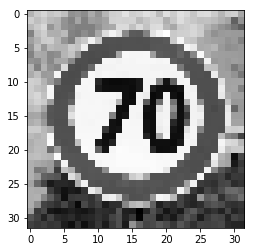

In [40]:
# Preprocessing the test images
import numpy as np
test_data_p = rgbtogray(test_data)
test_data_p = test_data_p - np.mean(test_data_p)
print(test_data_p.shape)

plt.imshow(np.squeeze(test_data_p[0]), cmap='gray')
plt.show()

### Predict the Sign Type for Each Image

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [42]:
# Read the sign number and name list
import pandas as pd

TrafficSignNames = pd.read_csv('signnames.csv')
TrafficSignNames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [43]:
test_data_label = [4, 12, 14, 17, 25]

### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [45]:
import tensorflow as tf
prob = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    predicted_class = sess.run(prob, feed_dict={x: test_data_p, keep_prob: 1.0})


INFO:tensorflow:Restoring parameters from ./trafficnet


In [46]:
predicted_class.shape

(5, 43)

In [47]:
with tf.Session() as sess:
    values, indices = sess.run(tf.nn.top_k(predicted_class, k=5))

In [48]:
values

array([[  9.80768621e-01,   1.90075450e-02,   2.23854498e-04,
          3.15457704e-09,   9.39693767e-10],
       [  1.00000000e+00,   6.70707623e-09,   3.30949512e-09,
          6.46404597e-10,   5.15818638e-11],
       [  9.99996901e-01,   3.04855416e-06,   4.61806549e-09,
          1.27681843e-09,   9.48653711e-10],
       [  1.00000000e+00,   5.31074797e-27,   5.51634003e-29,
          4.53332673e-29,   3.20029462e-29],
       [  1.00000000e+00,   3.38783499e-13,   1.77561484e-14,
          4.24490595e-17,   6.43854889e-18]], dtype=float32)

In [49]:
indices

array([[ 4,  0,  1,  8,  2],
       [12, 40, 13, 42, 41],
       [14, 33, 13, 17,  9],
       [17, 38,  9, 10, 13],
       [25, 20, 21, 27, 18]], dtype=int32)

In [50]:
# The accuracy of classification of the 5 test images
with tf.Session() as sess:
    accuracy = sess.run(tf.equal(test_data_label, indices[:,0]))
print (accuracy)
accuracy = sum(accuracy)/len(accuracy)
accuracy


[ True  True  True  True  True]


1.0

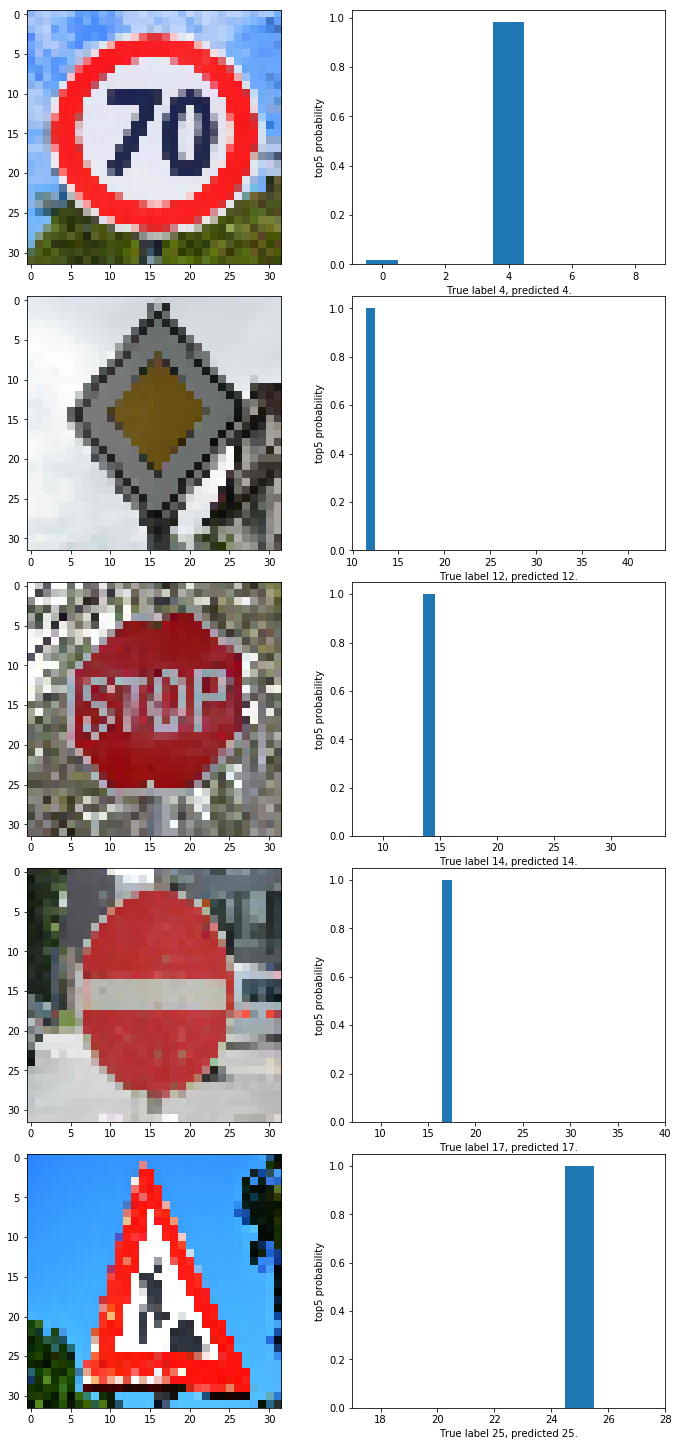

In [51]:
# Plot images along side their predictions
fig, axes = plt.subplots(5,2, figsize=(10, 20))
fig.tight_layout()
for i in range(len(predicted_class)):
    
    axes[i,0].imshow(test_data[i])
    axes[i,1].bar(indices[i], height = values[i], width = 1.0) 
    axes[i,1].set_ylabel('top5 probability')
    axes[i,1].set_xlabel('True label {tlabel}, predicted {plabel}.' .format(tlabel=test_data_label[i], plabel=indices[i,0]))
    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.